In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("cleaned_tayara_cars2.0.csv")

In [3]:
print("nb of brands "+str(df["brand"].nunique()))
print("nb of fuel types "+str(df["Fuel_Type"].nunique()))
print("nb of cities "+str(df["city"].nunique()))
print("nb of car models "+str(df["model"].nunique()))

nb of brands 23
nb of fuel types 2
nb of cities 24
nb of car models 400


In [4]:
df.drop(["price"],axis=1,inplace=True)
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.drop(["Kms_Driven"],axis=1,inplace=True)
df.drop(["year"],axis=1,inplace=True)
df.head()

,brand,model,Fuel_Type,Horse_pow,city,nb_year,log_price,log_Kms_Driven
0,Volkswagen,Polo,Diesel,4.0,Ben arous,0,4.096910,0.000000
1,Opel,Astra,Diesel,1.0,Tunis,13,4.332438,5.255273
2,Volkswagen,Polo,Diesel,4.0,Ben arous,0,4.096910,0.000000
3,Opel,Astra,Diesel,1.0,Tunis,13,4.332438,5.255273
4,Volkswagen,Polo,Essence,5.0,Tunis,2,4.653213,4.462398


In [5]:
#encoding model frequency
model_frequency  = df.groupby('model').size()/len(df)
df.loc[:,'model_freq_encode'] = df['model'].map(model_frequency)

df.drop(["model"],axis=1,inplace=True)

df.head()

,brand,Fuel_Type,Horse_pow,city,nb_year,log_price,log_Kms_Driven,model_freq_encode
0,Volkswagen,Diesel,4.0,Ben arous,0,4.096910,0.000000,0.053937
1,Opel,Diesel,1.0,Tunis,13,4.332438,5.255273,0.013065
2,Volkswagen,Diesel,4.0,Ben arous,0,4.096910,0.000000,0.053937
3,Opel,Diesel,1.0,Tunis,13,4.332438,5.255273,0.013065
4,Volkswagen,Essence,5.0,Tunis,2,4.653213,4.462398,0.053937


In [6]:
#encoding brand frequency
brand_frequency  = df.groupby('brand').size()/len(df)
df.loc[:,'brand_freq_encode'] = df['brand'].map(brand_frequency)
df.drop(["brand"],axis=1,inplace=True)

df.head()

,Fuel_Type,Horse_pow,city,nb_year,log_price,log_Kms_Driven,model_freq_encode,brand_freq_encode
0,Diesel,4.0,Ben arous,0,4.096910,0.000000,0.053937,0.155460
1,Diesel,1.0,Tunis,13,4.332438,5.255273,0.013065,0.035479
2,Diesel,4.0,Ben arous,0,4.096910,0.000000,0.053937,0.155460
3,Diesel,1.0,Tunis,13,4.332438,5.255273,0.013065,0.035479
4,Essence,5.0,Tunis,2,4.653213,4.462398,0.053937,0.155460


In [7]:
#encoding city frequency
city_frequency  = df.groupby('city').size()/len(df)
df.loc[:,'city_freq_encode'] = df['city'].map(city_frequency)
df.drop(["city"],axis=1,inplace=True)

df.head()

,Fuel_Type,Horse_pow,nb_year,log_price,log_Kms_Driven,model_freq_encode,brand_freq_encode,city_freq_encode
0,Diesel,4.0,0,4.096910,0.000000,0.053937,0.155460,0.101762
1,Diesel,1.0,13,4.332438,5.255273,0.013065,0.035479,0.311998
2,Diesel,4.0,0,4.096910,0.000000,0.053937,0.155460,0.101762
3,Diesel,1.0,13,4.332438,5.255273,0.013065,0.035479,0.311998
4,Essence,5.0,2,4.653213,4.462398,0.053937,0.155460,0.311998


In [8]:
#encoding fuel frequency
fuel_frequency  = df.groupby('Fuel_Type').size()/len(df)
df.loc[:,'fuel_freq_encode'] = df['Fuel_Type'].map(fuel_frequency)


df.drop(["Fuel_Type"],axis=1,inplace=True)
df.head()


,Horse_pow,nb_year,log_price,log_Kms_Driven,model_freq_encode,brand_freq_encode,city_freq_encode,fuel_freq_encode
0,4.0,0,4.096910,0.000000,0.053937,0.155460,0.101762,0.356826
1,1.0,13,4.332438,5.255273,0.013065,0.035479,0.311998,0.356826
2,4.0,0,4.096910,0.000000,0.053937,0.155460,0.101762,0.356826
3,1.0,13,4.332438,5.255273,0.013065,0.035479,0.311998,0.356826
4,5.0,2,4.653213,4.462398,0.053937,0.155460,0.311998,0.643174


In [9]:
#encoding horsepow frequency
fuel_frequency  = df.groupby('Horse_pow').size()/len(df)
df.loc[:,'horse_freq_encode'] = df['Horse_pow'].map(fuel_frequency)


df.drop(["Horse_pow"],axis=1,inplace=True)
df.head()

,nb_year,log_price,log_Kms_Driven,model_freq_encode,brand_freq_encode,city_freq_encode,fuel_freq_encode,horse_freq_encode
0,0,4.096910,0.000000,0.053937,0.155460,0.101762,0.356826,0.167805
1,13,4.332438,5.255273,0.013065,0.035479,0.311998,0.356826,0.009709
2,0,4.096910,0.000000,0.053937,0.155460,0.101762,0.356826,0.167805
3,13,4.332438,5.255273,0.013065,0.035479,0.311998,0.356826,0.009709
4,2,4.653213,4.462398,0.053937,0.155460,0.311998,0.643174,0.355747


In [10]:
df.columns.tolist()

['nb_year',
 'log_price',
 'log_Kms_Driven',
 'model_freq_encode',
 'brand_freq_encode',
 'city_freq_encode',
 'fuel_freq_encode',
 'horse_freq_encode']

In [11]:
L= list(df.columns.values)
del L[1]

In [12]:
X=df[L]
X

,nb_year,log_Kms_Driven,model_freq_encode,brand_freq_encode,city_freq_encode,fuel_freq_encode,horse_freq_encode
0,0,0.000000,0.053937,0.155460,0.101762,0.356826,0.167805
1,13,5.255273,0.013065,0.035479,0.311998,0.356826,0.009709
2,0,0.000000,0.053937,0.155460,0.101762,0.356826,0.167805
3,13,5.255273,0.013065,0.035479,0.311998,0.356826,0.009709
4,2,4.462398,0.053937,0.155460,0.311998,0.643174,0.355747
...,...,...,...,...,...,...,...
8338,8,4.934498,0.008031,0.150186,0.101762,0.643174,0.355747
8339,12,5.365488,0.024452,0.133046,0.014623,0.643174,0.175716
8340,6,5.004321,0.026369,0.041232,0.065684,0.643174,0.355747
8341,13,5.436163,0.021335,0.155460,0.005394,0.643174,0.132087


In [13]:
y=df[['log_price']]
y

,log_price
0,4.096910
1,4.332438
2,4.096910
3,4.332438
4,4.653213
...,...
8338,4.459392
8339,4.371068
8340,4.574031
8341,4.462398


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [15]:
#standardization scaler 
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

#  Linear Regression


In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#predicting the test set result
y_pred = regressor.predict(X_test)


#evaluate the results
from sklearn import metrics


print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 0.1757249618849295
MSE: 0.12621292095037118
RMSE: 0.35526457880060486


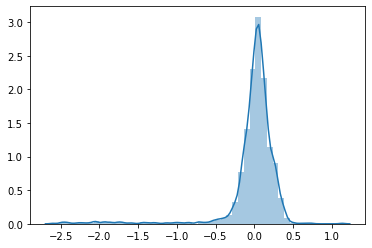

In [17]:
sns.distplot(y_test-y_pred)

# Decision Tree Regressor

In [18]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)            
dtr_y_pred=dtr.predict(X_test)    
print('MAE:', metrics.mean_absolute_error(y_test, dtr_y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, dtr_y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_y_pred)))

MAE: 0.20269131288825087
MSE: 0.2037024937092359
RMSE: 0.45133412646202137


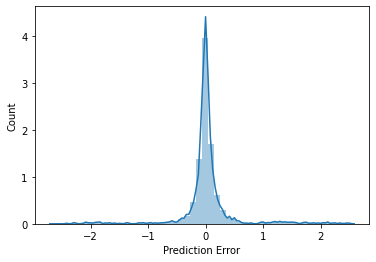

In [20]:
y_test=y_test.to_numpy()
y_test=np.squeeze(y_test)
sns.distplot(y_test-dtr_y_pred)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

# Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
#use the random grid to search for best hyperparameters
#first create the best model to tune
rf = RandomForestRegressor()

In [ ]:
import numpy as np
#HyperParameters for Randomized Search CV
#note for self : Randomized searchCV is much faster than Grid SearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train.values.ravel())

In [ ]:
rf_random.best_params_

In [ ]:
predictions = rf_random.predict(X_test)

In [ ]:
y_test=y_test.to_numpy()
y_test=np.squeeze(y_test)

sns.distplot(y_test-predictions)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))  
print('MSE:', metrics.mean_squared_error(y_test, predictions))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# XGBoost

In [22]:
import xgboost as xgb
from sklearn.model_selection import train_test_split


In [23]:
net = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                       colsample_bynode=1, colsample_bytree=1, gamma=0,
                       importance_type='gain', learning_rate=0.08, max_delta_step=0,
                       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
                       n_jobs=1, nthread=None, random_state=0,
                       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                       silent=None, subsample=0.75, verbosity=1, objective='reg:squarederror')

In [27]:
net.fit(X_train, y_train)
XGB_y_pred=net.predict(X_test)

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, XGB_y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, XGB_y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, XGB_y_pred)))

MAE: 0.15196680668587836
MSE: 0.1012960862550101
RMSE: 0.31827046085838706


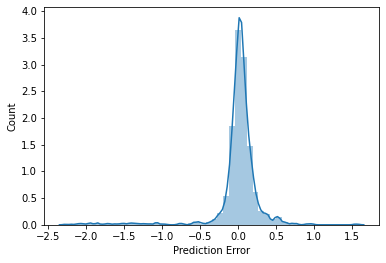

In [29]:
sns.distplot(y_test-XGB_y_pred)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")